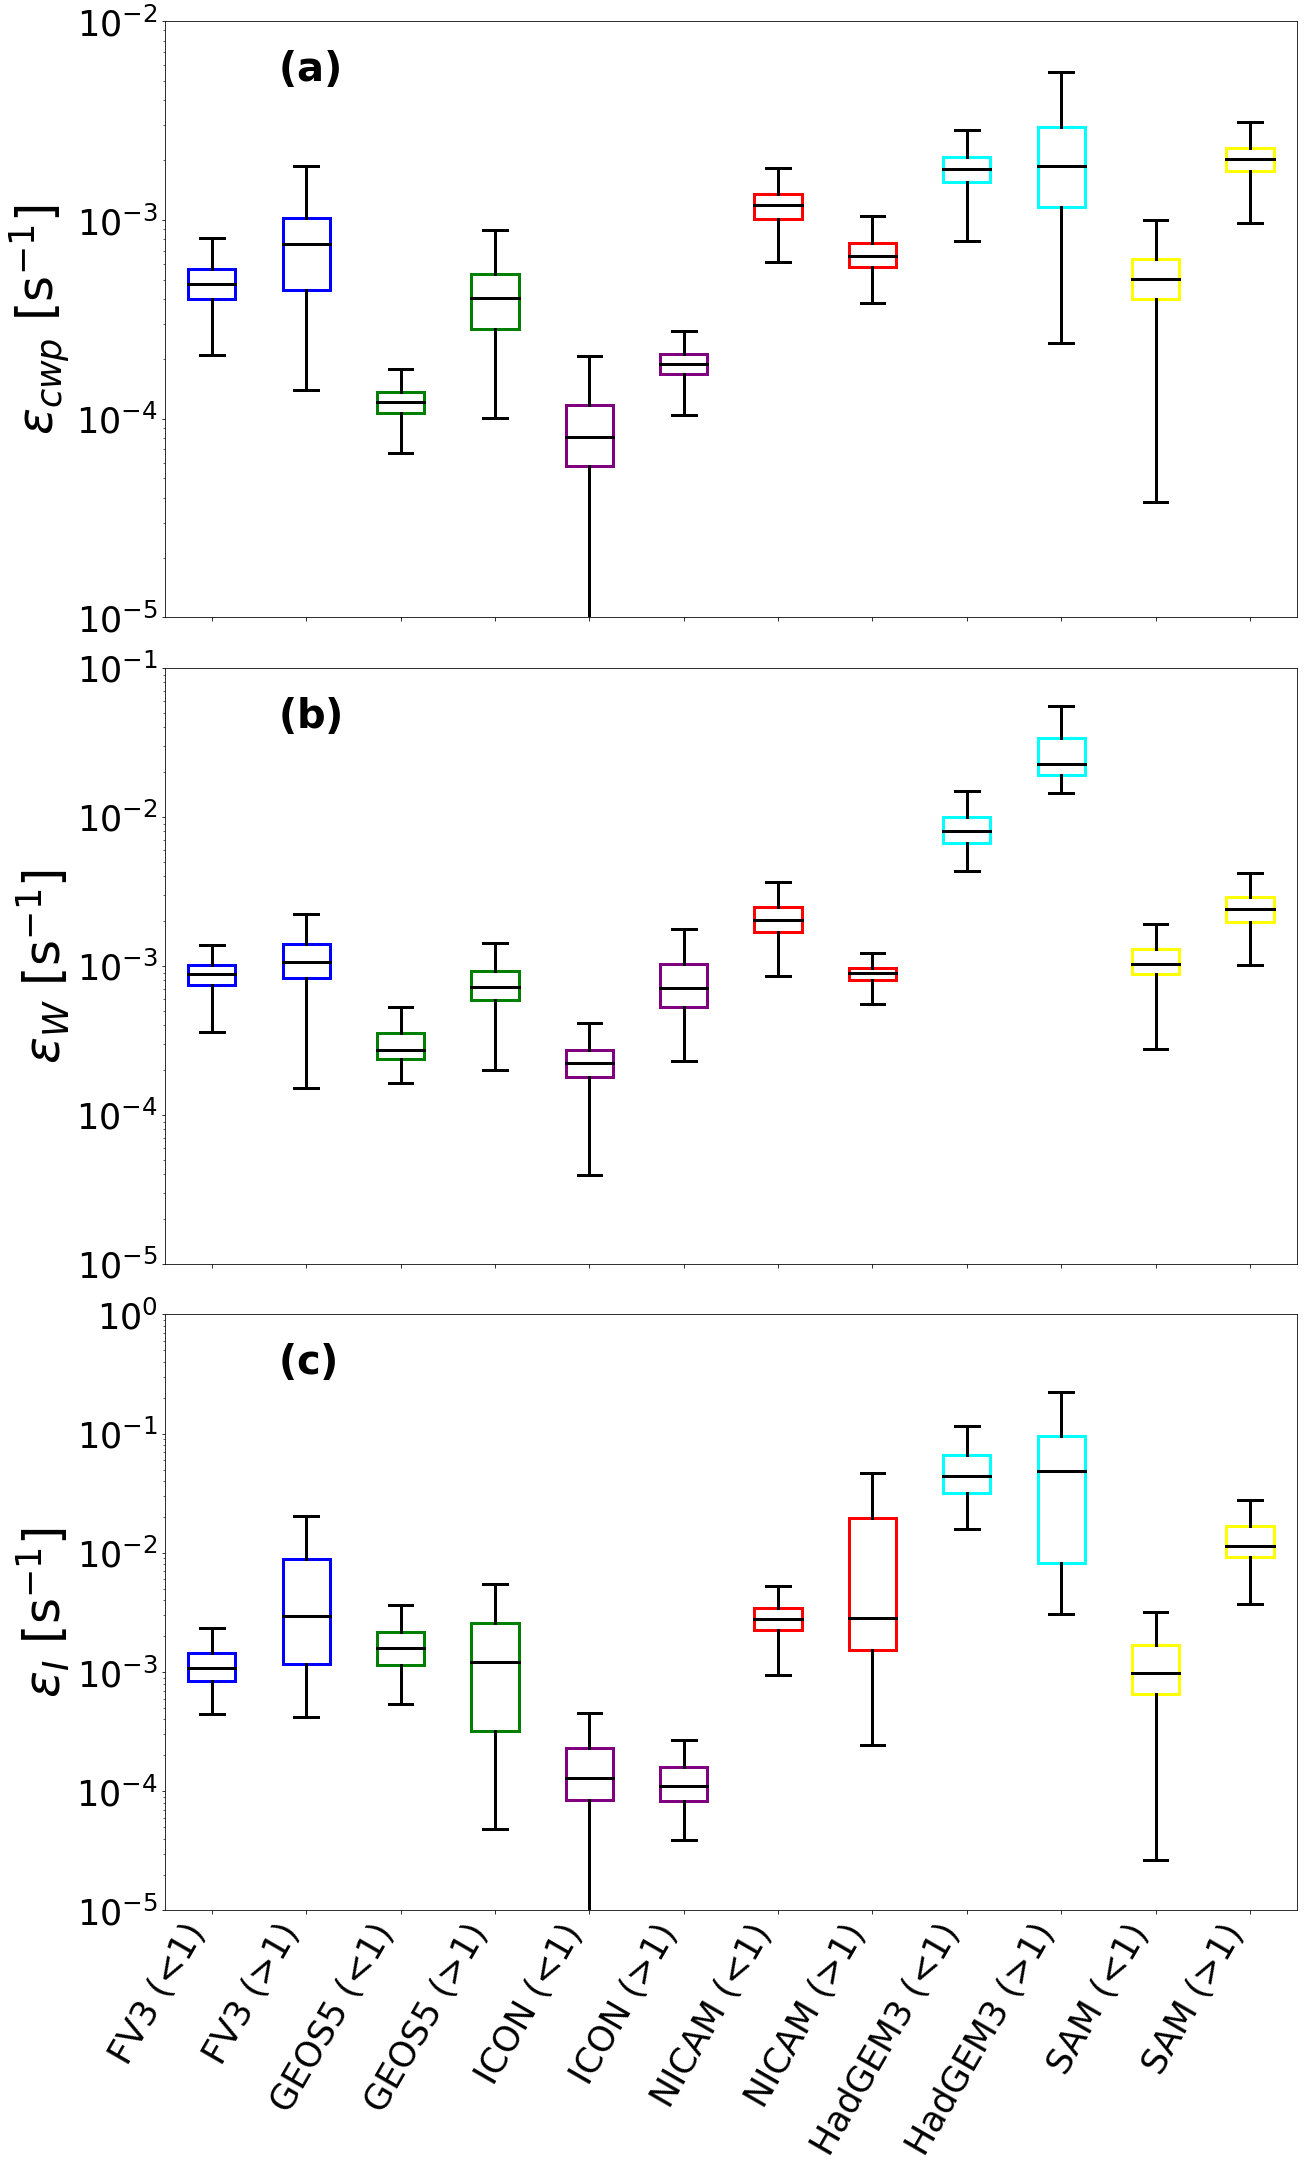

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Directories
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_PRECEFF/TIME_AVERAGING_CWP_FILTERED/'
basedir2 = '/xdisk/sylvia/temakgoale/DYAMOND/ICE_PATH_PRECEFF/'

models = ['FV3', 'GEOS5', 'ICON', 'HadGEM3', 'NICAM', 'SAM']
# Requested x-axis label format
labels = ['FV3 (<1)', 'FV3 (>1)', 'GEOS5 (<1)', 'GEOS5 (>1)', 'ICON (<1)', 'ICON (>1)', 'NICAM (<1)', 'NICAM (>1)', 'HadGEM3 (<1)', 'HadGEM3 (>1)', 'SAM (<1)', 'SAM (>1)']
#colors = ['blue', 'green', 'purple', 'red', 'cyan', 'yellow'] * 2
colors = ['blue','blue','green', 'green', 'purple','purple', 'red','red', 'cyan','cyan', 'yellow','yellow'] 

def load_data(basedir, var, intensity):
    """Load datasets with correct file naming."""
    var_part = f"_{var}" if var else ""
    return [xr.open_dataset(f"{basedir}{model}{var_part}_PRECEFF_{intensity}mm_hr_20160809-20160909_Asia_timeavg.nc")['PRECEFF_TIMEAVG'][0].values for model in models]

def clean_data(data):
    """Remove NaNs from dataset."""
    return [d[~np.isnan(d)] for d in data]

# Load and clean datasets
dataset1 = clean_data(load_data(basedir, '', 'less1') + load_data(basedir, '', '1'))
dataset2 = clean_data(load_data(basedir2, 'CLOUD_WATER_PATH', 'less1') + load_data(basedir2, 'CLOUD_WATER_PATH', '1'))
dataset3 = clean_data(load_data(basedir2, 'CLOUD_ICE_PATH', 'less1') + load_data(basedir2, 'CLOUD_ICE_PATH', '1'))

datasets = [dataset1, dataset2, dataset3]
y_labels = [r'$\epsilon_{cwp}$ [s$^{-1}$]', r'$\epsilon_{W}$ [s$^{-1}$]', r'$\epsilon_{I}$ [s$^{-1}$]']
y_lims = [(10**-5, 10**-2), (10**-5, 10**-1), (10**-5, 1)]
titles = [r'$\bf{(a)}$', r'$\bf{(b)}$', r'$\bf{(c)}$']

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(18, 30), constrained_layout=True)
for i, (ax, data, y_label, ylim, title) in enumerate(zip(axes, datasets, y_labels, y_lims, titles)):
    box = ax.boxplot(data, patch_artist=True, showfliers=False)

    # Customize box colors and lines
    for patch, color in zip(box['boxes'], colors):
        patch.set(facecolor='white', edgecolor=color, linewidth=3)
    for element in ['whiskers', 'caps', 'medians']:
        for item in box[element]:
            item.set(linewidth=3, color='black' if element == 'medians' else item.get_color())

    # Set y-axis properties
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.set_ylabel(y_label, fontsize=50)
    ax.tick_params(axis='y', labelsize=35)
    ax.text(0.1, 0.9, title, transform=ax.transAxes, fontsize=40)

    # Set x-axis labels only for plot (c)
    if i < 2:
        ax.set_xticklabels([])
    else:
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, fontsize=35, rotation=60, ha='right')

#plt.savefig('/home/u32/temakgoale/Figure_7_Box_whisker_Plots_CWP_filtered.png', dpi=50, bbox_inches='tight')
#plt.savefig("/home/u32/temakgoale/Figure_7_Box_whisker_Plots_CWP_filtered.pdf", format="pdf", dpi=50, bbox_inches="tight")